**Atividade Splines cúbicos**

**Nome:** Lais de Figueiredo Maia ; 2016034704

In [202]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from scipy import interpolate
%matplotlib inline

Vamos interpolar a função de Runge, $f(x) = \frac{1}{1+25x^2}$, num conjunto de $n$ nós regularmente espaçados

$$
x_k = -1 + \frac{2(k-1)}{n-1}, \; \; k = 1,2, \ldots , n
$$

**1 - Considere os $n=4,6,8,11$ e calcule os polinomios de intepolação de Lagrange $P_N (x)$ para 41 pontos regularmente espaçados. Calcule o erro específico no cálculo usando $\epsilon = \frac{f(x) - P_N(x)}{f(x)}$. Aumentar o número de pontos melhora o resultado?**

In [73]:
# Neville Algorithm:
#
# O algoritmo tem 3 partes, 
# Na primeira encontra o indice mais proximo do
# valor de x onde se quer estimar f(x)
def polint(xa,ya,x):
    n = xa.size
    c = np.copy(ya)
    d = np.copy(ya)
    ns=1
    dy = 0.
    # dif eh a diferenca do valor de entrada x com o primeiro valor 
    # de nossos dados xa[0]
    # dift eh um array, com a diferenca entre x e cada um dos xa
    dif = abs(x - xa[0])
    dift = np.abs(x - xa)
    for i in range (n):
        if (dift[i] < dif):
            ns = i
            dif = dift[i]
    # depois desse loop ns é o índice de xa mais próximo de x
    # ya é o valor de ya nesse indice
    y = ya[ns]
    ns = ns-1
    
    # Segunda parte: calcula os polinomios C e D de esquerda 
    # a direita, no loop mais externo m vai desde o primeiro ponto, m=0
    # até o penultimo ponto n-2
    for m in range(n-1):
        # o loop interno inicialmente tem n-1 elementos
        # esse número vai diminuindo em 1 a cada iteracao
        for i in range(0,(n-m-1)):
            ho = xa[i] - x
            hp = xa[i+m+1] - x
            w = c[i+1]-d[i]
            den = ho - hp
            if (den == 0):
                print('Error, den=0')
                break
            den = w/den
            d[i] = hp*den
            c[i] = ho*den
                
        #Terceira parte: Escolhemos o caminho pelo qual o erro é 
        # mínimo. 
        if (2*ns < n-m-2):
            dy = c[ns+1]
        else:
            dy = d[ns]
            ns = ns-1
        y = y+dy
    return y, dy

In [203]:
#Método de Lagrange para n=4:

n = 4

#loop que gera os valores de x conhecidos e os respectivos valores de f(x)
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))

xk = np.asarray(xk)
yk = np.asarray(yk)

# Criamos valores de x para os quais não conhecemos os valores de y e chamamos a funcao polint para cada ponto x
N = 41
xnovo = np.linspace(-1,1,N)
f = np.zeros_like(xnovo)
err = np.zeros_like(xnovo)

for k in range(N):
    f[k], err[k] = polint(xk,yk,xnovo[k])

Text(0.5, 1.0, 'Interpolação por Lagrange para n=4')

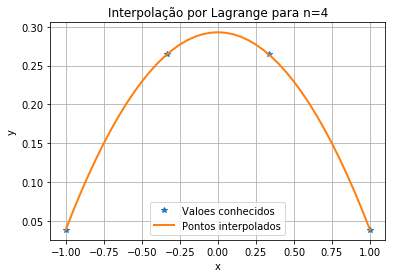

In [204]:
#Plotando os valores obtidos para n=4

plt.plot(xk,yk,'*',label='Valoes conhecidos')
plt.plot(xnovo,f, '-', lw=2, label='Pontos interpolados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolação por Lagrange para n=4')

In [167]:
#Cálculo do erro para n=4
#x1 é um ponto qualquer dentro do limite da interpolação
f[10], err[10] = polint(xk,yk,xnovo[10])
x1 = xnovo[10]
y1= 1/(1+25*x1**2)

erro = (y1 - f[10])/(y1)

print("O erro na Interpolação de Lagrange para n =", n, "é:", round(np.abs(erro),4))

O erro na Interpolação de Lagrange para n = 4 é: 0.6628


In [205]:
#Método de Lagrange para n=6:

#loop que gera os valores de x conhecidos e os respectivos valores de f(x)
n = 6
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))

xk = np.asarray(xk)
yk = np.asarray(yk)

# Criamos valores de x para os quais não conhecemos os valores de y e chamamos a funcao polint para cada ponto x
N = 41
xnovo = np.linspace(-1,1,N)
f = np.zeros_like(xnovo)
err = np.zeros_like(xnovo)

for k in range(N):
    f[k], err[k] = polint(xk,yk,xnovo[k])

Text(0.5, 1.0, 'Interpolação por Lagrange para n=6')

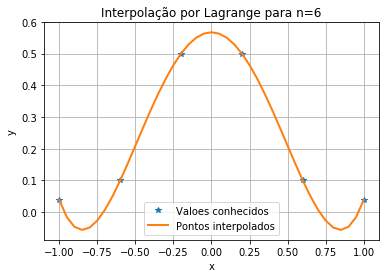

In [206]:
#Plotando os valores para n=6

plt.plot(xk,yk,'*',label='Valoes conhecidos')
plt.plot(xnovo,f, '-', lw=2, label='Pontos interpolados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolação por Lagrange para n=6')

In [207]:
#Cálculo do erro para n=6
#x1 é um ponto qualquer dentro do limite da interpolação
f[10], err[10] = polint(xk,yk,xnovo[10])
x1 = xnovo[10]
y1= 1/(1+25*x1**2)

erro = (y1 - f[10])/(y1)

print("O erro na Interpolação de Lagrange para n =", n, "é:", round(np.abs(erro),4))

O erro na Interpolação de Lagrange para n = 6 é: 0.5206


In [208]:
#Método de Lagrange para n=8:

#loop que gera os valores de x conhecidos e os respectivos valores de f(x)
n = 8
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))

xk = np.asarray(xk)
yk = np.asarray(yk)

# Criamos valores de x para os quais não conhecemos os valores de y e chamamos a funcao polint para cada ponto x
N = 41
xnovo = np.linspace(-1,1,N)
f = np.zeros_like(xnovo)
err = np.zeros_like(xnovo)

for k in range(N):
    f[k], err[k] = polint(xk,yk,xnovo[k])

Text(0.5, 1.0, 'Interpolação por Lagrange para n=8')

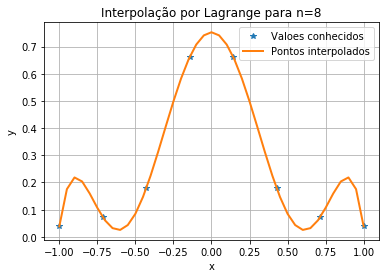

In [209]:
#Plotando os valores para n=8

plt.plot(xk,yk,'*',label='Valoes conhecidos')
plt.plot(xnovo,f, '-', lw=2, label='Pontos interpolados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolação por Lagrange para n=8')

In [210]:
#Cálculo do erro para n=8
#x1 é um ponto qualquer dentro do limite da interpolação
f[10], err[10] = polint(xk,yk,xnovo[10])
x1 = xnovo[10]
y1= 1/(1+25*x1**2)

erro = (y1 - f[10])/(y1)

print("O erro na Interpolação de Lagrange para n =", n, "é:", round(np.abs(erro),4))

O erro na Interpolação de Lagrange para n = 8 é: 0.3844


In [211]:
#Método de Lagrange para n=11:

#loop que gera os valores de x conhecidos e os respectivos valores de f(x)
n = 11
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))

xk = np.asarray(xk)
yk = np.asarray(yk)

# Criamos valores de x para os quais não conhecemos os valores de y e chamamos a funcao polint para cada ponto x
N = 41
xnovo = np.linspace(-1,1,N)
f = np.zeros_like(xnovo)
err = np.zeros_like(xnovo)

for k in range(N):
    f[k], err[k] = polint(xk,yk,xnovo[k])

Text(0.5, 1.0, 'Interpolação por Lagrange para n=11')

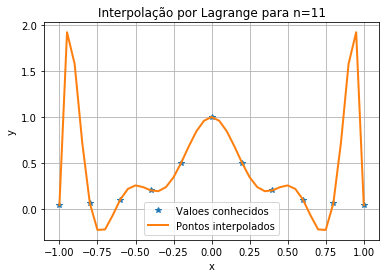

In [212]:
#Plotando os valores para n=11

plt.plot(xk,yk,'*',label='Valoes conhecidos')
plt.plot(xnovo,f, '-', lw=2, label='Pontos interpolados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolação por Lagrange para n=11')

In [213]:
#Cálculo do erro para n=11
#x1 é um ponto qualquer dentro do limite da interpolação
f[10], err[10] = polint(xk,yk,xnovo[10])
x1 = xnovo[10]
y1= 1/(1+25*x1**2)

erro = (y1 - f[10])/(y1)

print("O erro na Interpolação de Lagrange para n =", n, "é:", round(np.abs(erro),4))

O erro na Interpolação de Lagrange para n = 11 é: 0.8397


Nota-se que no método de Interpolação de Lagrande há um aumento do erro nos extremos da função quando se aumenta o número de pontos conhecidos. 

**2 - Agora utilize splines cúbicos e calcule o polinomio de interpolação $S(x)$ para 41 pontos regularmente espaçados. Os pontos conhecidos iniciais são 4 tal como no ponto 1. Repita para 6 e para 8 pontos igualmente espaçados. Calcule o erro, $\epsilon = \frac{f(x) - S(x)}{f(x)}$. O aumento de número de pontos conhecidos melhora a interpolação?**

Text(0.5, 1.0, 'Para n=6 usando splrep')

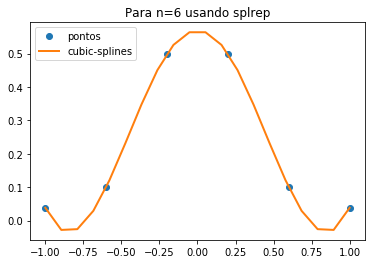

In [214]:
#Método de Splines cúbicos para n=6:

#loop que gera os valores de x conhecidos e os respectivos valores de f(x)
n = 6
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))

#gera tupla que tem (t,c,k), t são so pontos c são os coeficientes, e k a ordem:
tck = interpolate.splrep(xk, yk, s=0)

#para determinar valores de x no mesmo intervalo, porem em pontos intermediarios:
xnovo = np.linspace(-1,1,20)

#gera a interpolação:
ycs = interpolate.splev(xnovo, tck, der=0)

#Gráfico para n=6
plt.plot(xk,yk,'o', label='pontos')
plt.plot(xnovo,ycs,label='cubic-splines',lw=2)
plt.legend(loc=2)
plt.title('Para n=6 usando splrep')

In [57]:
#Cálculo do erro para n=6
#x1 é um ponto qualquer dentro do limte da interpolação
x1 = xnovo[6]
y1= 1/(1+25*x1**2)

ycs1 = interpolate.splev(x1, tck, der=0)
erro = (y1 - ycs1)/(y1)

print("O erro no Splines cúbicos para n =", n, "é:", round(np.abs(erro),4))

O erro para n = 6 é: 0.5252


Text(0.5, 1.0, 'Para n=6 usando interp1d')

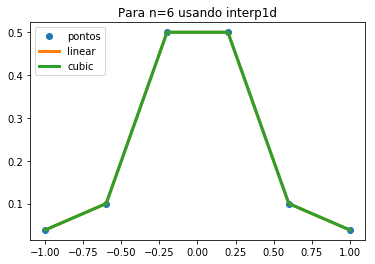

In [5]:
#usando interp1d para n=6
f1= interp1d(xk, yk, kind='linear')
f3 = interp1d(xk, yk, kind='cubic')

plt.plot(xk,yk,'o', label='pontos')
plt.plot(xk,f1(xk),label='linear',lw=3)
plt.plot(xk,f3(xk),label='cubic',lw=3)
plt.legend(loc=2)
plt.title('Para n=6 usando interp1d')

Text(0.5, 1.0, 'Para n=8 usando splrep')

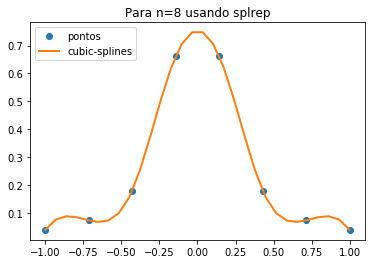

In [215]:
#Método de Splines cúbicos para n=8:

#loop que gera os valores de x conhecidos e os respectivos valores de f(x)
n= 8
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))
    
#gera tupla que tem (t,c,k), t são so pontos c são os coeficientes, e k a ordem:
tck = interpolate.splrep(xk, yk, s=0)

#para determinar valores de x no mesmo intervalo, porem em pontos intermediarios:
xnovo = np.linspace(-1,1,30)

#gera a interpolação:
ycs = interpolate.splev(xnovo, tck, der=0)

# Agora podemos graficar
plt.plot(xk,yk,'o', label='pontos')
plt.plot(xnovo,ycs,label='cubic-splines',lw=2)
plt.legend(loc=2)
plt.title('Para n=8 usando splrep')

In [69]:
#Cálculo do erro para n=8
#x1 é um ponto qualquer dentro do limte da interpolação

x1 = xnovo[10]
y1 =1/(1+25*x1**2)

ycs1 = interpolate.splev(x1, tck, der=0)
erro = (y1 - ycs1)/(y1)

print("O erro no Splines cúbicos para n =", n, "é:", np.abs(round(erro,4)))

O erro para n = 8 é: 0.273


Text(0.5, 1.0, 'Para n=41 usando splrep')

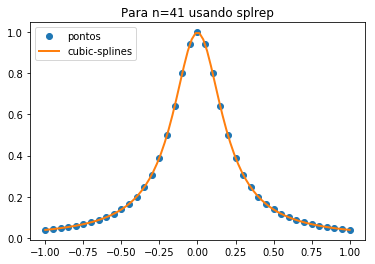

In [216]:
#Método de Splines cúbicos para n=41:

#loop que gera os valores de x conhecidos e os respectivos valores de f(x)
n = 41
dados =[]
xk =[]
yk =[]
for k in range(1,n+1):
    x = -1 + (2*(k-1))/(n-1)
    xk.append((x))
    y= 1/(1+25*x**2)
    yk.append((y))
    dados.append((x,y))
    
#para determinar valores de x no mesmo intervalo, porem em pontos intermediarios:
xnovo = np.linspace(-1,1,80)

#gera tupla que tem (t,c,k), t são so pontos c são os coeficientes, e k a ordem:
tck = interpolate.splrep(xk, yk, s=0)

#gera a interpolação
ycs = interpolate.splev(xnovo, tck, der=0)

#gráfico para n=41
plt.plot(xk,yk,'o', label='pontos')
plt.plot(xnovo,ycs,label='cubic-splines',lw=2)
plt.legend(loc=2)
plt.title('Para n=41 usando splrep')

In [217]:
#Cálculo do erro para n=41
#x1 é um ponto qualquer dentro do limte da interpolação

x1 = xnovo[20]
y1 =1/(1+25*x1**2)

ycs1 = interpolate.splev(x1, tck, der=0)
erro = (y1 - ycs1)/(y1)

print("O erro no Splines cúbicos para n =", n, "é:", round(erro,8))

O erro para n = 41 é: 3.36e-06


É possível notar que aumentando o número de pontos conhecidos no método de Splines cúbicos a interpolação melhora significativamente, havendo, assim, uma diminuição do erro com o aumento dos pontos. 

Desse modo, o método de Splines cúbicos é mais adequado para interpolar a função de Runge, uma vez que nesse método é feito uma interpolação por partes, em que cada segmento entre os pontos interpolados é um polinômio de grau 3, sendo mais eficiente na diminuição do erro de interpolação do que aumentar o grau do polinômio, como é feito na Interpolação de Lagrange. 